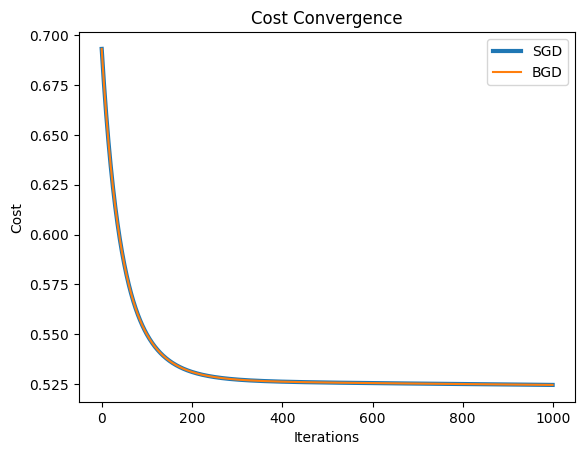

Length of SGD costs: 1000
Length of BGD costs: 1000
SGD Performance:
Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

BGD Performance:
Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [9]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
"""Compute the sigmoid activation function."""
def sigmoid(z):
    # Clip the input values to prevent overflow
    z_clipped = np.clip(z, -500, 500)  # Prevent overflow for extreme values
    return 1 / (1 + np.exp(-z_clipped))

# Binary cross-entropy loss
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient descent with/without feature scaling
"""Perform gradient descent to optimize the logistic regression model.
    Parameters:
    - X: Feature matrix
    - y: Target variable
    - learning_rate: Learning rate for gradient descent
    - num_iterations: Number of iterations
    - use_scaling: Implements feature scaling
    Returns:
    - theta: Updated model parameters
    - costs: List of costs over iterations
  """
def gradient_descent(X, y, learning_rate, num_iterations, use_scaling=True):
    m, n = X.shape
    # Initialize weights
    theta = np.zeros(n)
    costs = []

    for i in range(num_iterations):
        if use_scaling:
            X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
        else:
            X_scaled = X

        # Compute predictions
        y_pred = sigmoid(np.dot(X_scaled, theta))
        
        # Compute gradient
        gradient = np.dot(X_scaled.T, (y_pred - y)) / m
        
        # Update weights
        theta -= learning_rate * gradient
        
        # Compute and store cost
        cost = binary_cross_entropy(y, y_pred)
        costs.append(cost)

    return theta, costs

# Evaluate performance
"""Evaluate performance using appropriate metrics."""
def evaluate_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    
    # Compute precision only if there are predicted samples
    if np.sum(y_pred) > 0:
        precision = precision_score(y_true, y_pred)
    else:
        precision = 0.0  # Set precision to 0.0 if there are no predicted samples
    
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Data
data = {
    'Income': [50000, 75000, 60000, 80000, 45000, 90000, 55000, 70000, 65000, 85000],
    'Age': [25, 30, 28, 35, 22, 40, 26, 32, 29, 38],
    'Credit_Score': [650, 700, 680, 720, 620, 750, 670, 690, 660, 730],
    'Debt_to_Income_Ratio': [0.25, 0.30, 0.20, 0.35, 0.15, 0.40, 0.22, 0.28, 0.32, 0.38],
    'Loan_Amount': [10000, 15000, 12000, 18000, 9000, 20000, 11000, 16000, 14000, 19000],
    'Default': [0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
}

X = np.column_stack((data['Income'], data['Age'], data['Credit_Score'], data['Debt_to_Income_Ratio'], data['Loan_Amount']))
y = np.array(data['Default'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training with gradient descent
learning_rate = 0.01
num_iterations = 1000

# Stochastic Gradient Descent (SGD)
theta_sgd, costs_sgd = gradient_descent(X_train, y_train, learning_rate, num_iterations, use_scaling=True)

# Batch Gradient Descent (BGD)
theta_bgd, costs_bgd = gradient_descent(X_train, y_train, learning_rate, num_iterations, use_scaling=True)

# Plot cost convergence
plt.plot(costs_sgd, label='SGD', linewidth= 3)
plt.plot(costs_bgd, label='BGD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Convergence')
plt.legend()
plt.show()

# Testing
"""Make predictions using the logistic regression model."""
def predict(X, theta):
    return sigmoid(np.dot(X, theta))

# Predictions
y_pred_sgd = predict(X_test, theta_sgd)
y_pred_bgd = predict(X_test, theta_bgd)

# Evaluation
accuracy_sgd, precision_sgd, recall_sgd, f1_sgd = evaluate_performance(y_test, (y_pred_sgd > 0.5).astype(int))
accuracy_bgd, precision_bgd, recall_bgd, f1_bgd = evaluate_performance(y_test, (y_pred_bgd > 0.5).astype(int))

print("Length of SGD costs:", len(costs_sgd))
print("Length of BGD costs:", len(costs_bgd))

print("SGD Performance:")
print("Accuracy:", accuracy_sgd)
print("Precision:", precision_sgd)
print("Recall:", recall_sgd)
print("F1 Score:", f1_sgd)

print("\nBGD Performance:")
print("Accuracy:", accuracy_bgd)
print("Precision:", precision_bgd)
print("Recall:", recall_bgd)
print("F1 Score:", f1_bgd)

4. Fintech Example: 
   - Provide a brief explanation of how the credit scoring model optimized using gradient descent can be applied in the fintech industry.
   - Discuss the potential benefits and challenges of using machine learning models for credit scoring in fintech.

The credit scoring model implemented in our code, optimized using gradient descent, holds significant potential for application in the fintech industry. By leveraging features such as income, age, credit score, debt-to-income ratio, and loan amount, the model enables fintech companies to assess the credit risk of loan applicants efficiently. Through automated decision-making processes, the model could streamline loan approval procedures, providing quick and accurate evaluations of applicants' creditworthiness. Additionally, the model aids in regulatory compliance by ensuring fair and consistent decision-making processes, aligning with responsible lending practices and consumer protection regulations.

Machine learning models offer multiple benefits for credit scoring in the fintech industry, including improved accuracy, automation, risk mitigation, and efficiency. However, the use of machine learning models for credit scoring also presents multiple challenges. Bias could affect the fairness and accuracy of model predictions, while the lack of interpretability makes it difficult to understand and explain model decisions. Regulatory compliance is another concern, as fintech companies must navigate complex regulations related to consumer protection, fair lending practices, and data privacy. Additionally, model maintenance and monitoring are necessary to ensure continued accuracy and reliability over time, requiring resources and expertise.
